# QoE Prediction 

Work on different datasets found online in order to be ready for our internship 

## Import requirements 

In [2]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn


In [3]:
#Importing the data
data_5g = pd.read_csv('Datasets/output_with_5g.csv')
data = pd.read_csv('Datasets/output.csv')

print(data_5g.head())
print(data.head())
print(data_5g.columns)
print(data.columns)
print(data_5g.info())
print(data.info())
print(data_5g.describe())
print(data.describe())

   Unnamed: 0   mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0           0  2.85       84726         1030        134      19            0
1           1  2.27       53510          540        122      21            0
2           2  2.91       75756         1920         80      16            0
3           3  2.10      131389          690        102      25         1000
4           4  2.24      337008         2230        133      15            0
    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0  1.96      238472          660        195      18         1000
1  1.80       70946          300        181      23            0
2  2.25      316053          460        176      14         1000
3  1.88      160097          290        152      24            0
4  3.51      204129          770        104      26            0
Index(['Unnamed: 0', 'mos', 'throughput', 'avg_bitrate', 'delay_qos', 'jitter',
       'packet_loss'],
      dtype='object')
Index(['mos', 'throughp

In [4]:
#merge the two datasets into one with no new columns
data_5g = data_5g.drop(columns=['Unnamed: 0'])

frames = [data, data_5g]
data = pd.concat(frames, axis=0, ignore_index=True)
print(data.head())
print(data.columns)
print(data.info())
print(data.describe())



    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0  1.96      238472          660        195      18         1000
1  1.80       70946          300        181      23            0
2  2.25      316053          460        176      14         1000
3  1.88      160097          290        152      24            0
4  3.51      204129          770        104      26            0
Index(['mos', 'throughput', 'avg_bitrate', 'delay_qos', 'jitter',
       'packet_loss'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42281 entries, 0 to 42280
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mos          42281 non-null  float64
 1   throughput   42281 non-null  int64  
 2   avg_bitrate  42281 non-null  int64  
 3   delay_qos    42281 non-null  int64  
 4   jitter       42281 non-null  int64  
 5   packet_loss  42281 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.9 MB
None


In [5]:
#Data cleaning 
for i in range(len(data)):
    if data['delay_qos'][i] == -1000 \
    or data['delay_qos'][i] == 0 or data['avg_bitrate'][i] == 0:
        data = data.drop([i])
        continue
    if data['jitter'][i] == 0:
        data['jitter'][i] = 1
    if data['jitter'][i] == -1000:
        data['jitter'][i] = 1

data['mos'] = data['mos'] / 100

print (str(len(data)) + ' Data Loaded Successfully')

42281 Data Loaded Successfully


In [6]:
#Data exploration
print(data['mos'].describe())
print(data['mos'].isnull().sum())
print(data['avg_bitrate'].describe())
print(data['avg_bitrate'].isnull().sum())
print(data['delay_qos'].describe())
print(data['delay_qos'].isnull().sum())
print(data['jitter'].describe())
print(data['jitter'].isnull().sum())
print(data['packet_loss'].describe())
print(data['packet_loss'].isnull().sum())


count    42281.000000
mean         0.024930
std          0.009277
min          0.011300
25%          0.017200
50%          0.021700
75%          0.031600
max          0.048000
Name: mos, dtype: float64
0
count    42281.000000
mean      1680.057473
std       3867.820219
min         10.000000
25%        320.000000
50%        690.000000
75%       1430.000000
max      69900.000000
Name: avg_bitrate, dtype: float64
0
count    42281.000000
mean       202.232114
std        280.910438
min          1.000000
25%         83.000000
50%        131.000000
75%        184.000000
max       4468.000000
Name: delay_qos, dtype: float64
0
count    42281.000000
mean        33.005014
std         52.059103
min          1.000000
25%          8.000000
50%         17.000000
75%         35.000000
max        897.000000
Name: jitter, dtype: float64
0
count    42281.000000
mean       971.523852
std       1240.811781
min          0.000000
25%          0.000000
50%       1000.000000
75%       2000.000000
max       800

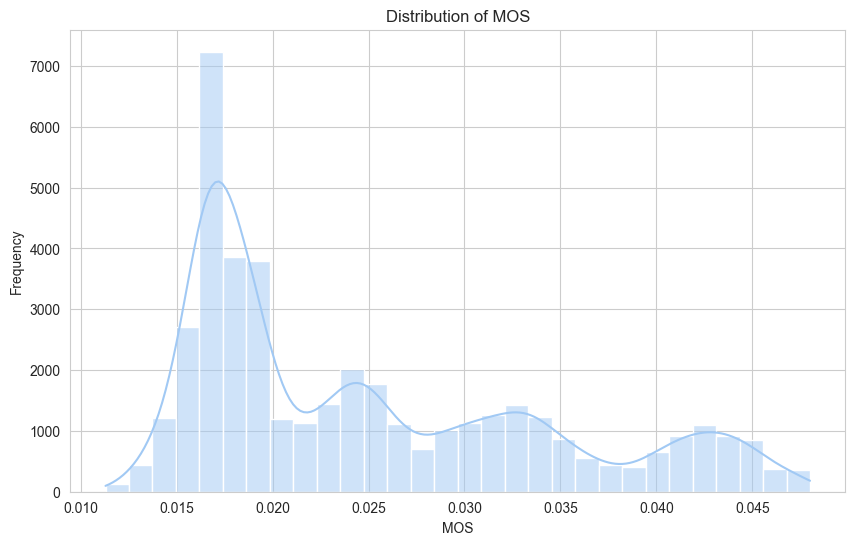

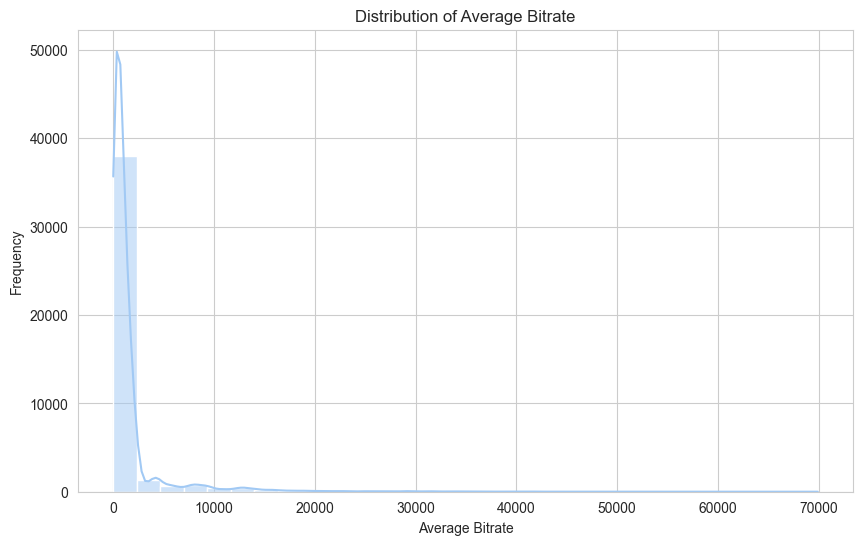

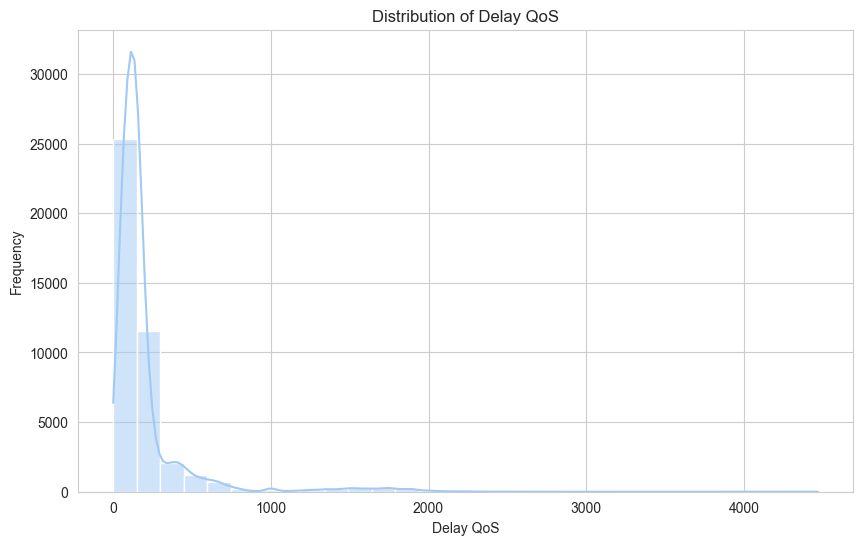

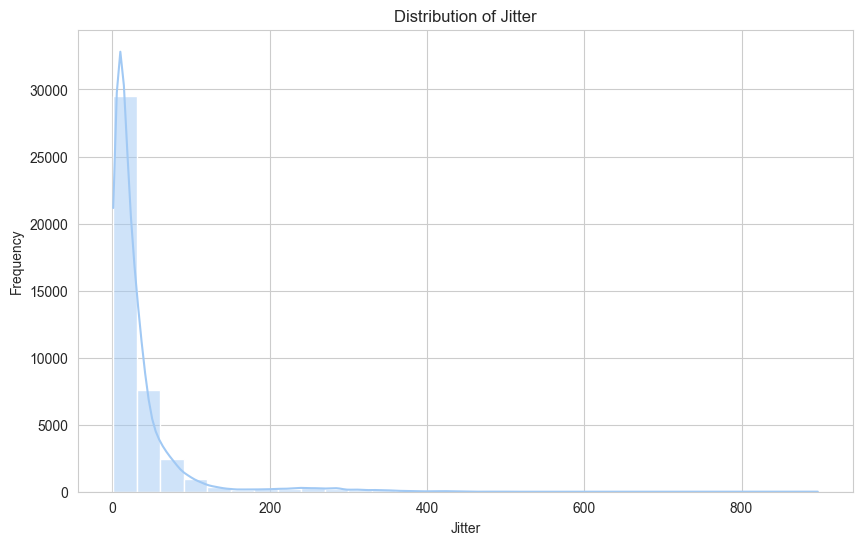

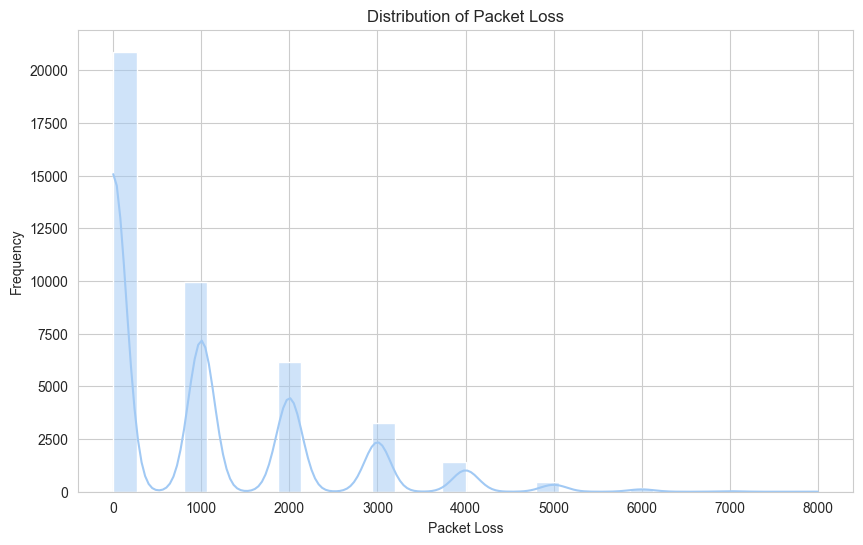

In [8]:
#Data visualization
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of MOS")
sns.histplot(data['mos'], kde=True, bins=30)
plt.xlabel("MOS")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Average Bitrate")
sns.histplot(data['avg_bitrate'], kde=True, bins=30)
plt.xlabel("Average Bitrate")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Delay QoS")
sns.histplot(data['delay_qos'], kde=True, bins=30)
plt.xlabel("Delay QoS")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Jitter")
sns.histplot(data['jitter'], kde=True, bins=30)
plt.xlabel("Jitter")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Packet Loss")
sns.histplot(data['packet_loss'], kde=True, bins=30)
plt.xlabel("Packet Loss")
plt.ylabel("Frequency")
plt.show()





<Axes: xlabel='avg_bitrate', ylabel='mos'>

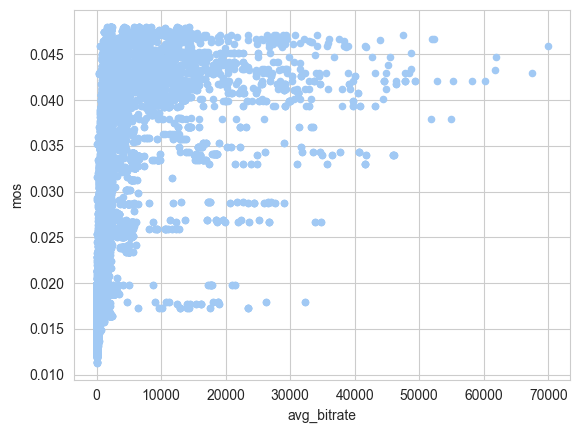

In [12]:
data.plot.scatter(x='avg_bitrate', y='mos')

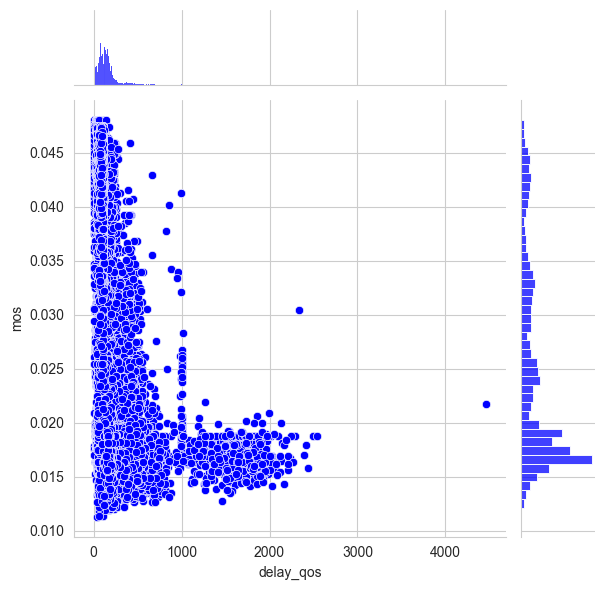

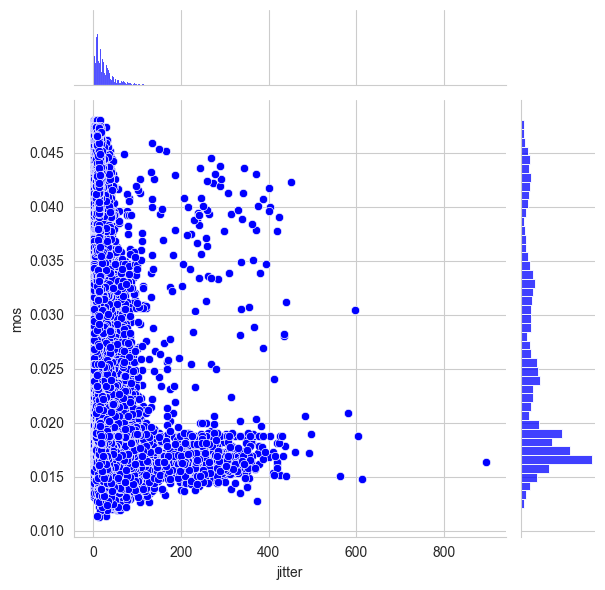

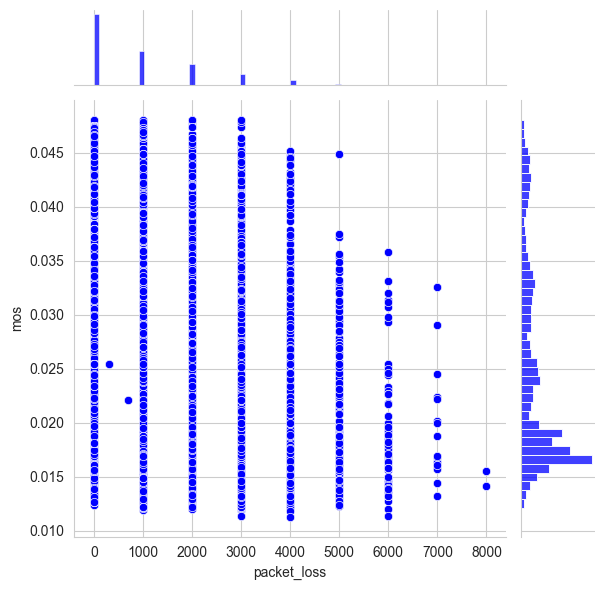

In [16]:
sns.jointplot(x='delay_qos', y='mos', data=data, kind='scatter', color='blue')
sns.jointplot(x='jitter', y='mos', data=data, kind='scatter', color='blue')
sns.jointplot(x='packet_loss', y='mos', data=data, kind='scatter', color='blue')


<Axes: xlabel='mos', ylabel='avg_bitrate'>

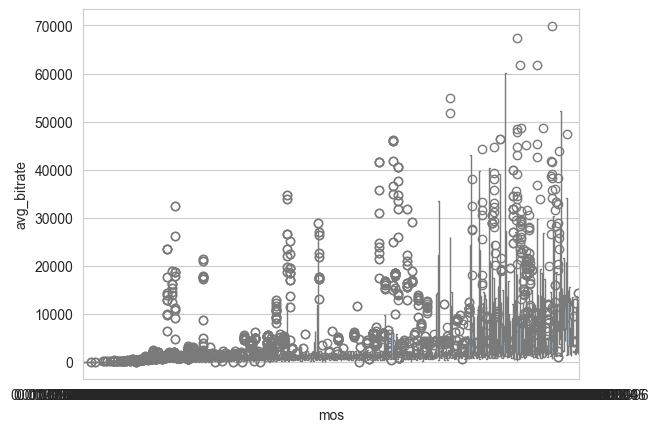

In [20]:
sns.boxplot(x='mos', y='avg_bitrate', data=data)


<Axes: xlabel='mos', ylabel='delay_qos'>

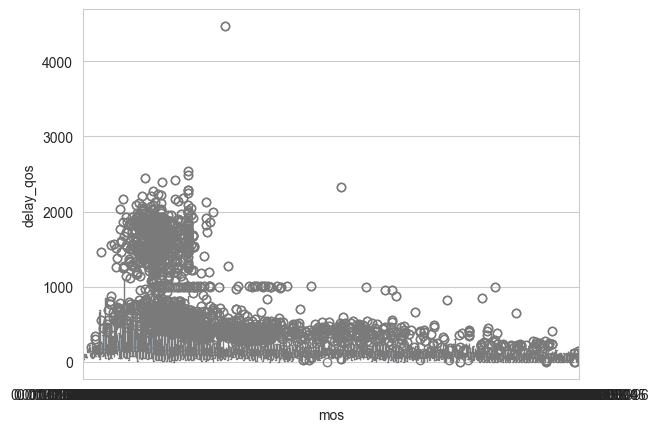

In [21]:
sns.boxplot(x='mos', y='delay_qos', data=data)


<Axes: xlabel='mos', ylabel='jitter'>

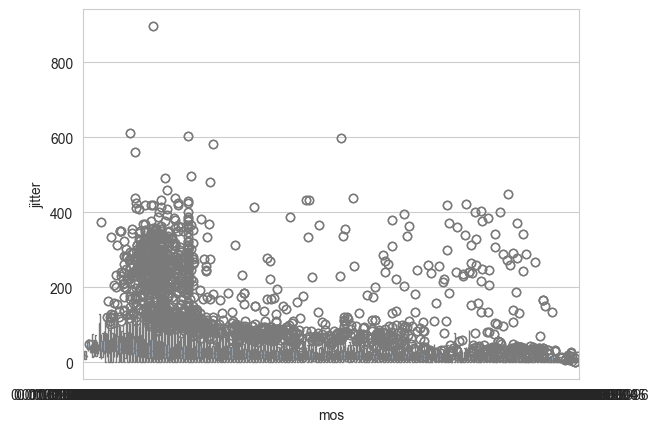

In [22]:
sns.boxplot(x='mos', y='jitter', data=data)


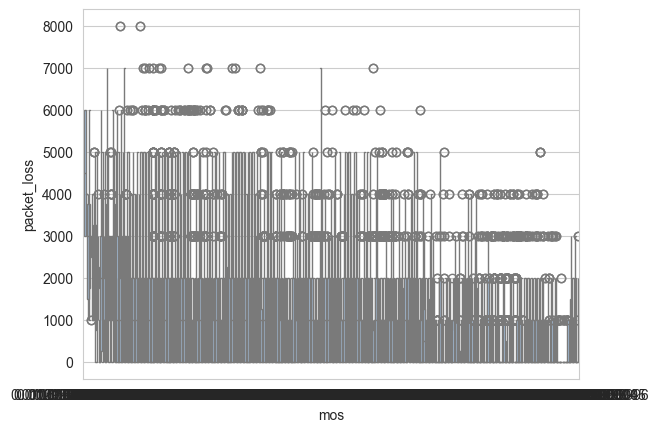

In [ ]:
sns.boxplot(x='mos', y='packet_loss', data=data)

/var/folders/v_/s9924rt92rq7bt_0_y31thsw0000gn/T/ipykernel_20762/1518310084.py:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x="mos", y="jitter", data=data, jitter=True, edgecolor="gray")


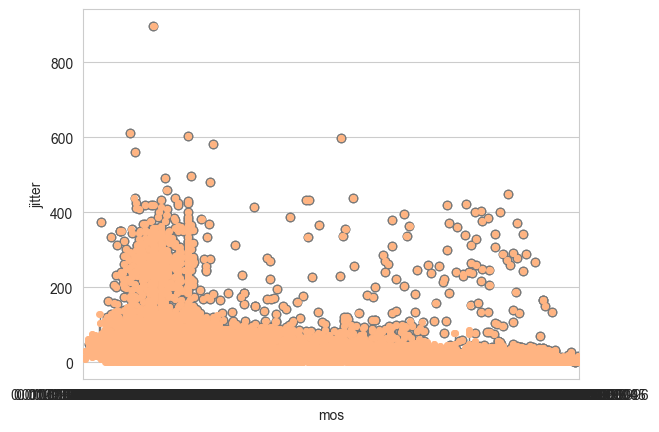

In [24]:
ax = sns.boxplot(x="mos", y="jitter", data=data)
ax = sns.stripplot(x="mos", y="jitter", data=data, jitter=True, edgecolor="gray")


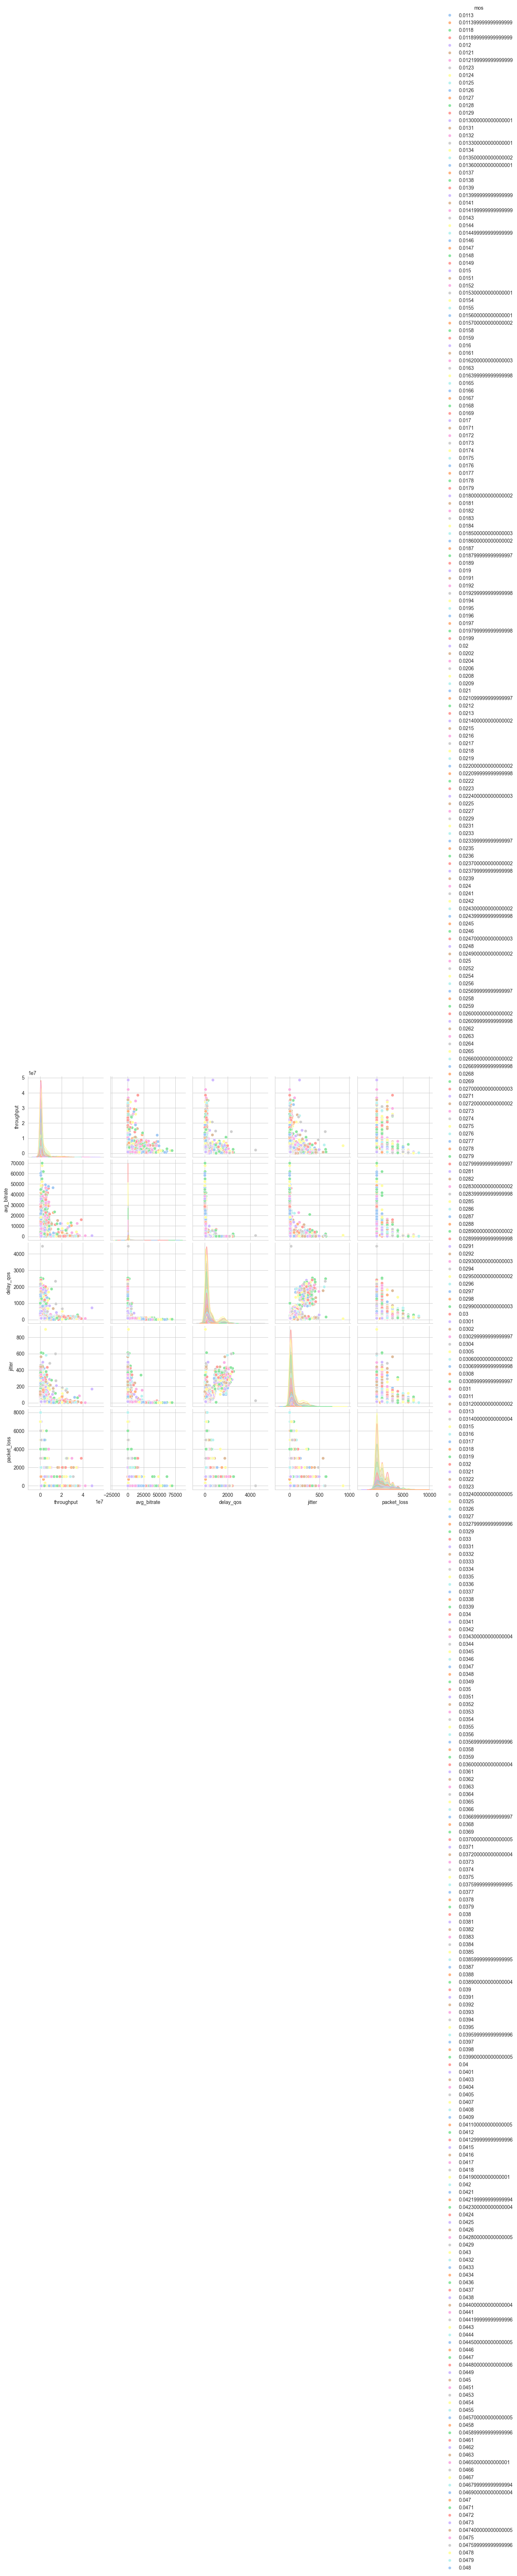

In [25]:
sns.pairplot(data, hue='mos', diag_kind='kde', palette='pastel')

<Axes: xlabel='mos', ylabel='avg_bitrate'>

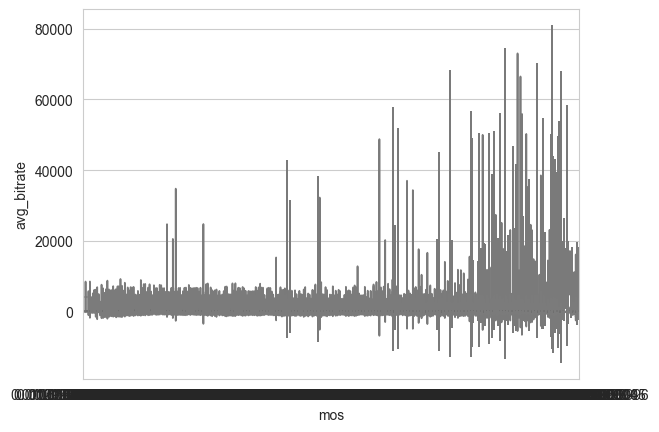

In [ ]:
sns.violinplot(x='mos', y='avg_bitrate', data=data, inner='quartile')



<Axes: xlabel='mos', ylabel='delay_qos'>

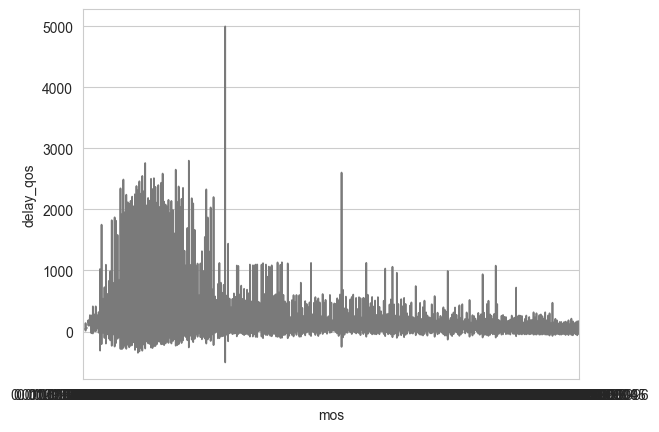

In [27]:
sns.violinplot(x='mos', y='delay_qos', data=data, inner='quartile')


<Axes: xlabel='mos', ylabel='jitter'>

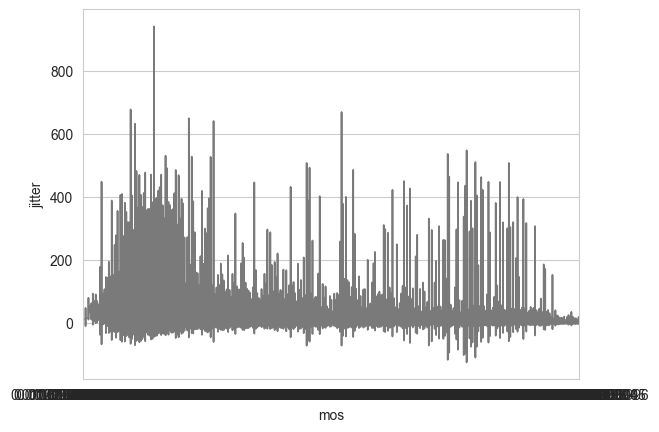

In [28]:
sns.violinplot(x='mos', y='jitter', data=data, inner='quartile')


<Axes: xlabel='mos', ylabel='packet_loss'>

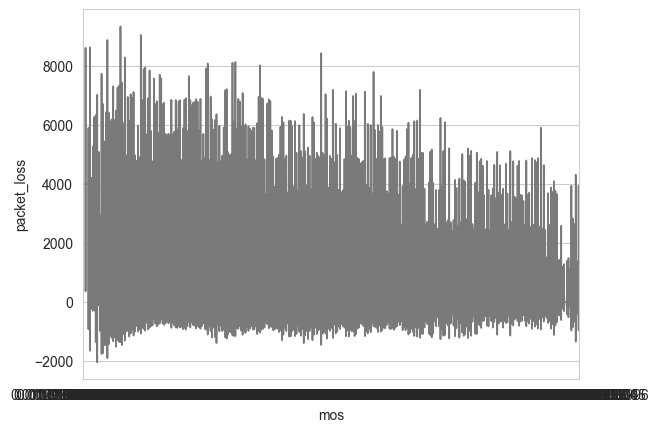

In [29]:
sns.violinplot(x='mos', y='packet_loss', data=data, inner='quartile')

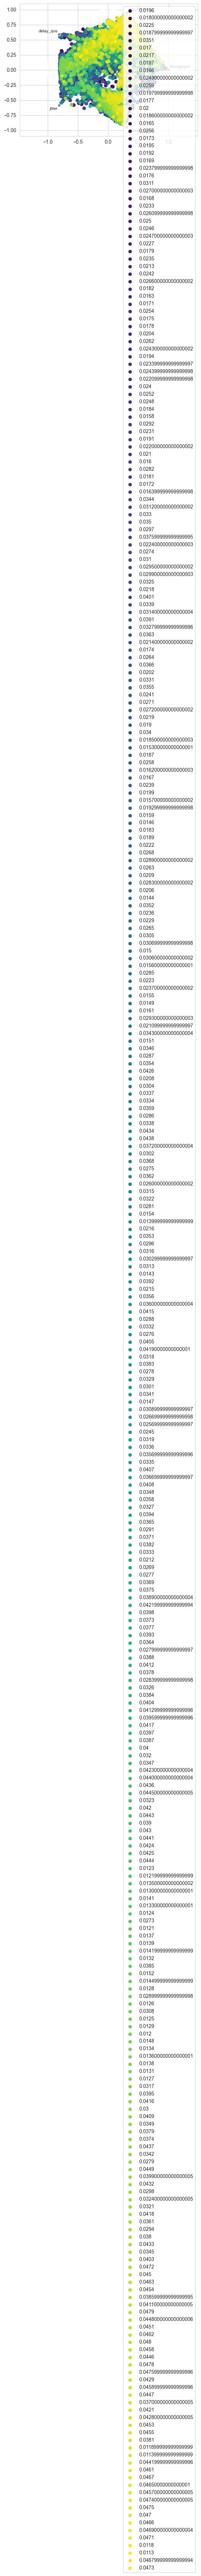

In [33]:
from pandas.plotting import radviz

# Correct usage of radviz with sample data
radviz(data, 'mos', colormap='viridis')
plt.show()


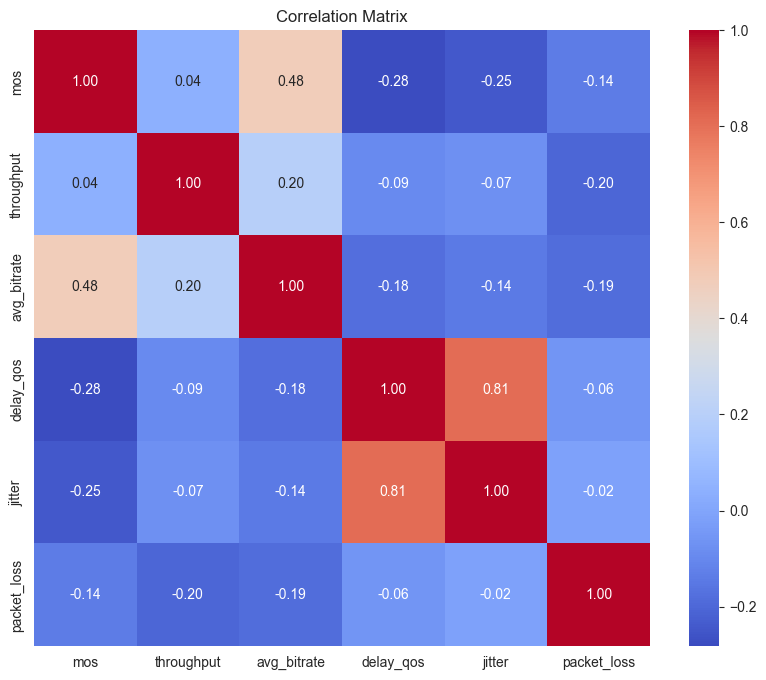

In [34]:
#Correlation matrix
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import normalize

In [ ]:
# Train